# IMPORTING MODULES

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cirrhosis.csv')
df = pd.DataFrame(data)
df.to_csv('rf_' + 'cirrhosis.csv')
df = pd.read_csv('rf_cirrhosis.csv')
df.head(5)

,Unnamed: 0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Previewing Dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     418 non-null    int64  
 1   ID             418 non-null    int64  
 2   N_Days         418 non-null    int64  
 3   Status         418 non-null    object 
 4   Drug           312 non-null    object 
 5   Age            418 non-null    int64  
 6   Sex            418 non-null    object 
 7   Ascites        312 non-null    object 
 8   Hepatomegaly   312 non-null    object 
 9   Spiders        312 non-null    object 
 10  Edema          418 non-null    object 
 11  Bilirubin      418 non-null    float64
 12  Cholesterol    284 non-null    float64
 13  Albumin        418 non-null    float64
 14  Copper         310 non-null    float64
 15  Alk_Phos       312 non-null    float64
 16  SGOT           312 non-null    float64
 17  Tryglicerides  282 non-null    float64
 18  Platelets 

<a id='2'></a><br>
# Data cleaning

In [51]:
df_clean = df.dropna()
df_clean

,Unnamed: 0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,D,D-penicillamine,25594,M,N,N,N,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,CL,Placebo,13918,F,N,Y,Y,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,308,1153,C,D-penicillamine,22347,F,N,Y,N,...,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,308,309,994,C,Placebo,21294,F,N,N,N,...,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,309,310,939,C,D-penicillamine,22767,F,N,N,N,...,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,310,311,839,C,D-penicillamine,13879,F,N,N,N,...,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


<a id='1'></a><br>
# Convert caterorical value to numeral value

In [52]:
colum_cat = ['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
for i in colum_cat:
    print('-------------------------')
    print(df[i].value_counts())
    print('-------------------------')

-------------------------
C     232
D     161
CL     25
Name: Status, dtype: int64
-------------------------
-------------------------
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64
-------------------------
-------------------------
F    374
M     44
Name: Sex, dtype: int64
-------------------------
-------------------------
N    288
Y     24
Name: Ascites, dtype: int64
-------------------------
-------------------------
Y    160
N    152
Name: Hepatomegaly, dtype: int64
-------------------------
-------------------------
N    222
Y     90
Name: Spiders, dtype: int64
-------------------------
-------------------------
N    354
S     44
Y     20
Name: Edema, dtype: int64
-------------------------


In [53]:
for i in colum_cat:
    print(f'Catagory of {i}')
    catlist = df_clean[i].unique()
    for j, val in enumerate(catlist):
         dftobjfinal = df_clean[i].replace({val:j},inplace=True)
         #print(dftobjfinal)
         print(j,val)
    print('--------------------------------')

Catagory of Status
0 D
1 C
2 CL
--------------------------------
Catagory of Drug
0 D-penicillamine
1 Placebo
--------------------------------
Catagory of Sex
0 F
1 M
--------------------------------
Catagory of Ascites
0 Y
1 N
--------------------------------
Catagory of Hepatomegaly
0 Y
1 N
--------------------------------
Catagory of Spiders
0 Y
1 N
--------------------------------
Catagory of Edema
0 Y
1 N
2 S
--------------------------------


/Users/shyammvm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [54]:
df_clean

,Unnamed: 0,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,1,400,0,0,21464,0,0,0,0,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,2,4500,1,0,20617,0,1,0,0,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,3,1012,0,0,25594,1,1,1,1,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,3,4,1925,0,0,19994,0,1,0,0,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,4,5,1504,2,1,13918,0,1,0,0,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,308,1153,1,0,22347,0,1,0,1,...,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,308,309,994,1,1,21294,0,1,1,1,...,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,309,310,939,1,0,22767,0,1,1,1,...,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,310,311,839,1,0,13879,0,1,1,1,...,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


/Users/shyammvm/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


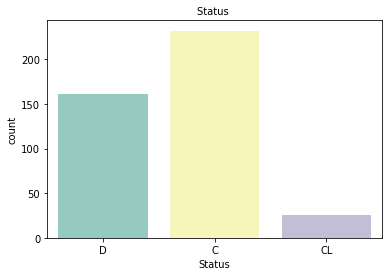

In [55]:
sns.countplot(df["Status"], palette="Set3")
plt.title("Status ",fontsize=10)
plt.show()

<a id='2'></a><br>
# Detect Outliers

In [56]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_clean)

In [57]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [58]:
len(outlier_index)

17

<a id='3'></a><br>
# Feature Selection

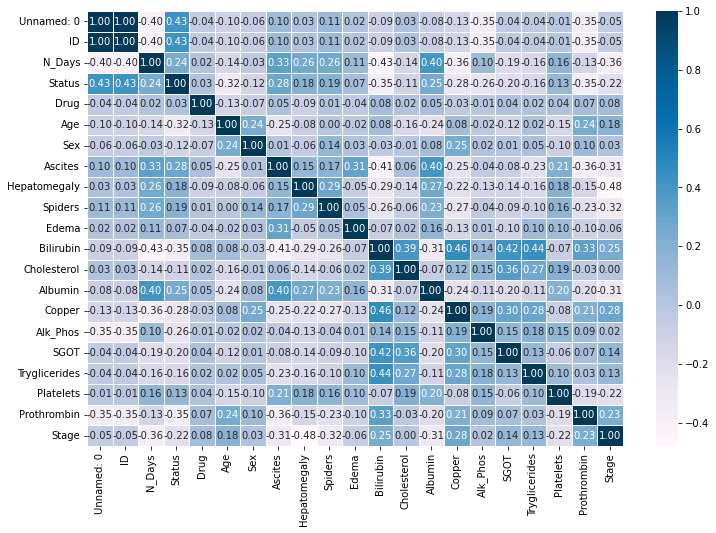

In [59]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_clean.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

<a id='4'></a><br>
# Dealing with Imbalanced Data

In [60]:

from imblearn.over_sampling import SMOTE
from collections import Counter

In [61]:
x = df_clean.drop(['Status','ID'], axis = 1)
y = df_clean.loc[:,'Status'].values

In [62]:
y.shape

(276,)

In [63]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 147, 0: 111, 2: 18})
Resampled dataset shape Counter({0: 147, 1: 147, 2: 147})


/Users/shyammvm/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


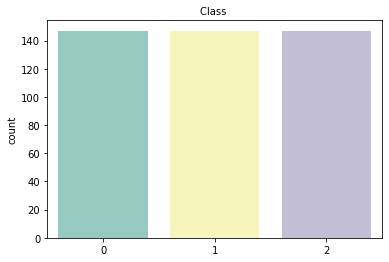

In [64]:
sns.countplot(y, palette='Set3')
plt.title("Class ",fontsize=10)
plt.show()

<a id='5'></a><br>
# Data Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<a id='14'></a><br>
## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)



# Accuracy

In [73]:
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.899


<a id='15'></a><br>
### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

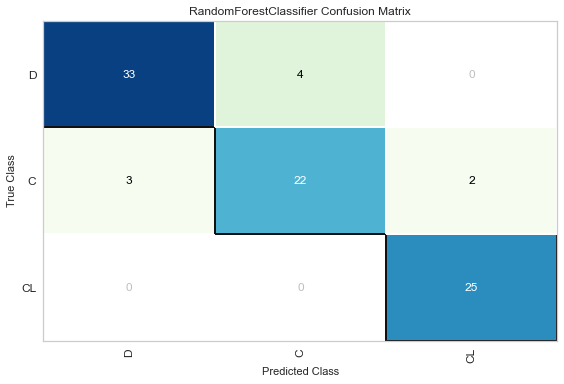

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
classes = ['D','C','CL']
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

<a id='11'></a><br>
### Classification Report

In [70]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.85      0.81      0.83        27
           2       0.93      1.00      0.96        25

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89

